In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
sns.set()

In [3]:
#Reading the dataset
data = pd.read_csv("E:\Python All in One\DATA_SETS\Machine Learning A-Z Template Folder\Part 3 - Classification\Section 15 - K-Nearest Neighbors (K-NN)\K_Nearest_Neighbors\Social_Network_Ads.csv")

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#Separating the independent and dependent variables
x = data.iloc[:,2:4].values
y = data.iloc[:, 4].values

In [6]:
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 0)
len(x_train)

300

In [8]:
#Building our model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [9]:
y_pred = classifier.predict(x_test)

In [13]:
#Evaluating our model using confusion matrix
from sklearn.metrics import confusion_matrix
score = classifier.score(x_test, y_test)*100
print(score)

#Printing Adjusted R-Squared values
adj_rsq = ((score*(len(x_test)+1))-2)/(len(x_test)-2-1)

print(adj_rsq)

#Printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

92.0
95.77319587628865
[[63  5]
 [ 3 29]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


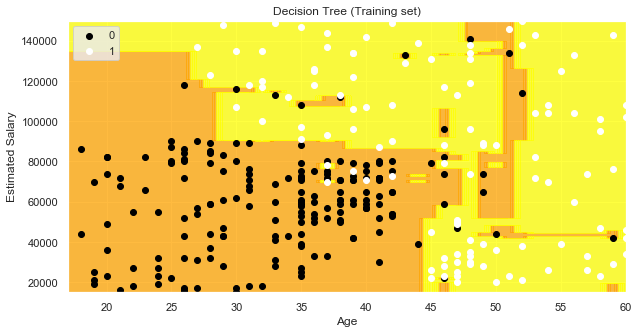

In [14]:
#Visualizing our training set
#Visualizing our Training Set

from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x[:,0].min()-1, stop = x[:, 0].max()+1),
                     np.arange(start = x[:,1].min()-1, stop = x[:, 1].max()+1)
                    
                    )
pt.figure(figsize = (10,5))
pt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'yellow')))
pt.xlim(x1.min(), x1.max())
pt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    pt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
pt.title('Decision Tree (Training set)')
pt.xlabel('Age')
pt.ylabel('Estimated Salary')
pt.legend()
pt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


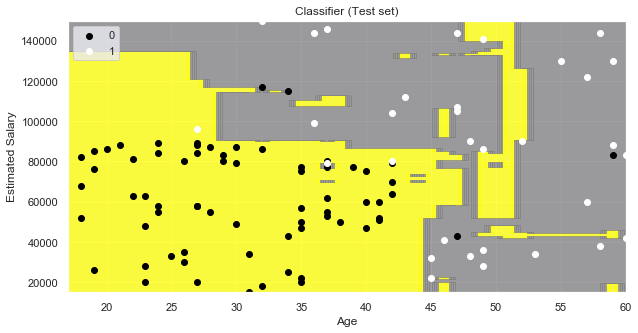

In [15]:
#Visualizing our Test Set
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x[:,0].min()-1, stop = x[:, 0].max()+1), 
                     np.arange(start = x[:,1].min()-1, stop = x[:, 1].max()+1)
                    
                    )
pt.figure(figsize = (10,5))
pt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'Grey')))
pt.xlim(x1.min(), x1.max())
pt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    pt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
pt.title('Classifier (Test set)')
pt.xlabel('Age')
pt.ylabel('Estimated Salary')
pt.legend()
pt.show()